# Обработка результатов

То, что получилось после работы на сервере:

In [1]:
! cat out_solo.txt

solo: N = 1000 time = 3.5599999999999997966e-05
solo: N = 1000000 time = 0.038913916999999999258
solo: N = 100000000 time = 3.7447314189999998391


In [2]:
! cat out_multi.txt

multi: N = 1000 p = 1 time = 3.5907e-05
multi: N = 1000 p = 2 time = 0.0296308
multi: N = 1000 p = 3 time = 0.0186335
multi: N = 1000 p = 4 time = 0.0218939
multi: N = 1000 p = 5 time = 0.0226761
multi: N = 1000 p = 6 time = 0.0235623
multi: N = 1000 p = 7 time = 0.0248648
multi: N = 1000 p = 8 time = 0.0266572
multi: N = 1000000 p = 1 time = 0.0384059
multi: N = 1000000 p = 2 time = 0.0553788
multi: N = 1000000 p = 3 time = 0.0329146
multi: N = 1000000 p = 4 time = 0.0279098
multi: N = 1000000 p = 5 time = 0.0301908
multi: N = 1000000 p = 6 time = 0.0274766
multi: N = 1000000 p = 7 time = 0.0290336
multi: N = 1000000 p = 8 time = 0.0300408
multi: N = 100000000 p = 1 time = 3.67348
multi: N = 100000000 p = 2 time = 1.85873
multi: N = 100000000 p = 3 time = 1.26645
multi: N = 100000000 p = 4 time = 0.942789
multi: N = 100000000 p = 5 time = 0.779809
multi: N = 100000000 p = 6 time = 0.643328
multi: N = 100000000 p = 7 time = 0.561738
multi: N = 100000000 p = 8 time = 0.528818


In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt

Отделяю числа и считаю ускорение

In [4]:
divided = np.array([[]])
with open("out_solo.txt", 'r') as sf:
    for i in range(3):
        cur_str = sf.readline()
        time = re.search(r'\d+\.\S+', cur_str).group(0)
        divided = np.append(divided, float(time))
    print(divided)

[3.56000000e-05 3.89139170e-02 3.74473142e+00]


In [5]:
with open("out_multi.txt", 'r') as mf:
    multi_times = np.array([])
    for j in range(3):
        time_N = np.array([])
        for i in range(8):
            cur_str = mf.readline()
            time = re.search(r'\d+\.\S+', cur_str).group(0)
            time_N = np.append(time_N, float(time))
        multi_times= np.append(multi_times, divided[j] / time_N)
multi_times.shape = [3, 8]
print(multi_times)

[[9.91450135e-01 1.20145254e-03 1.91053747e-03 1.62602369e-03
  1.56993487e-03 1.51088816e-03 1.43174287e-03 1.33547409e-03]
 [1.01322758e+00 7.02686172e-01 1.18226918e+00 1.39427431e+00
  1.28893295e+00 1.41625663e+00 1.34030630e+00 1.29536887e+00]
 [1.01939616e+00 2.01467207e+00 2.95687269e+00 3.97197190e+00
  4.80211362e+00 5.82087430e+00 6.66633096e+00 7.08132367e+00]]


Строю график

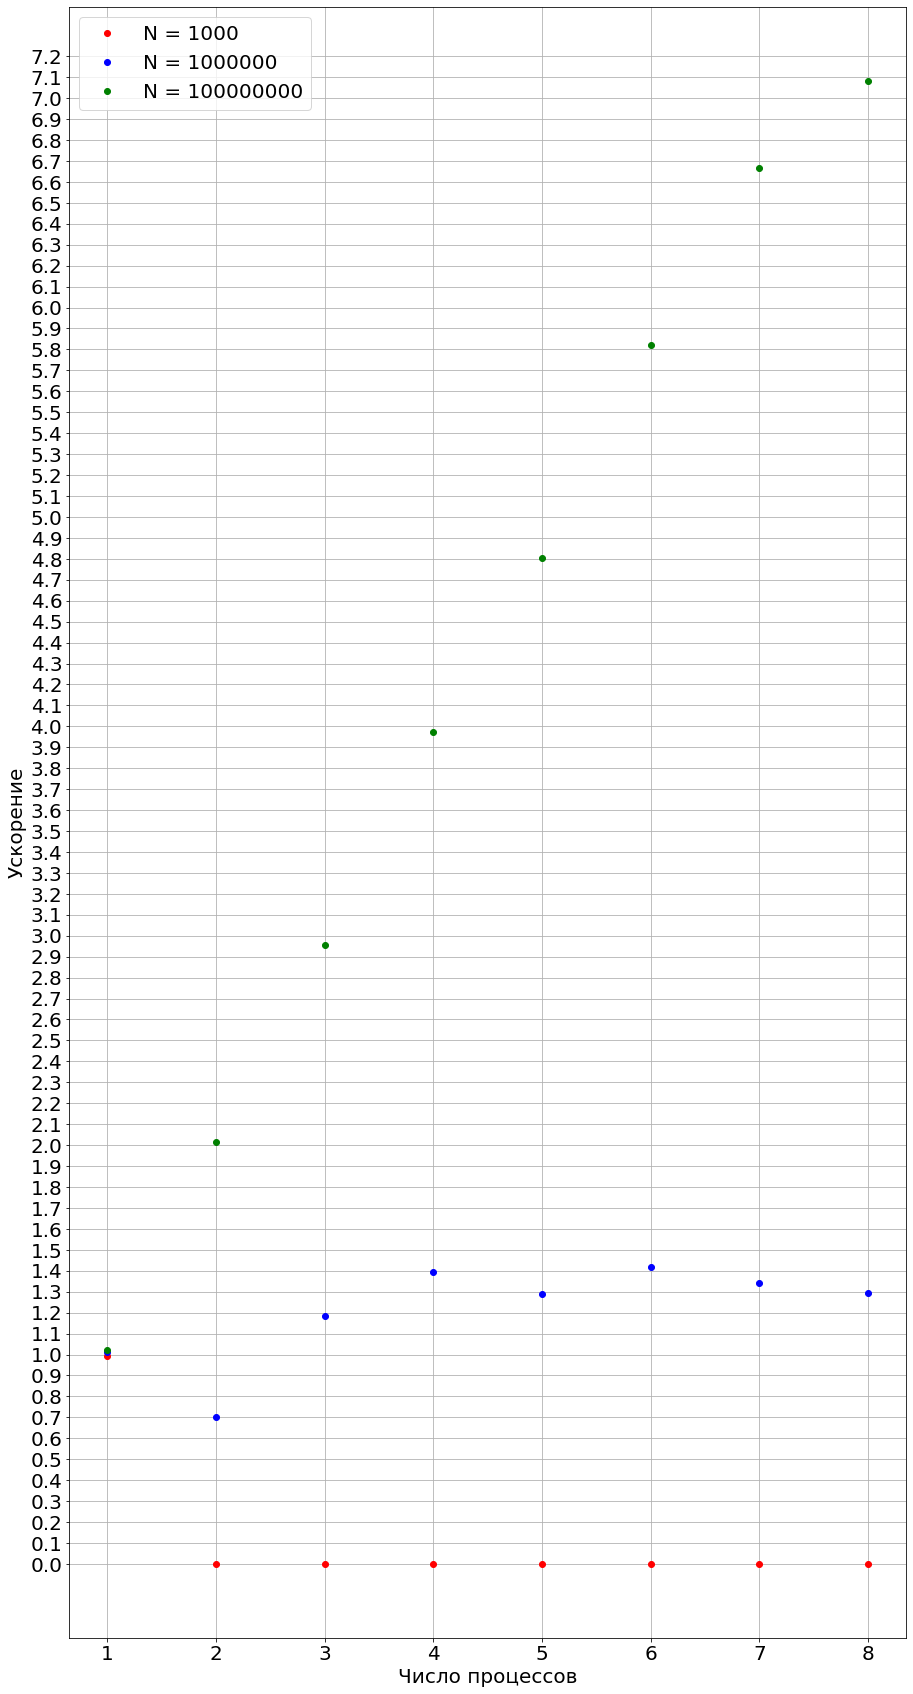

In [8]:
x = np.linspace(1, 8, 8)
plt.figure(figsize = (15, 30))
plt.plot(x, multi_times[0], 'ro', label = 'N = 1000')
plt.plot(x, multi_times[1], 'bo', label = 'N = 1000000')
plt.plot(x, multi_times[2], 'go', label = 'N = 100000000')
plt.ylabel('Ускорение', fontsize = 20)
plt.xlabel('Число процессов', fontsize = 20)
plt.legend(fontsize = 20, loc = 2)
plt.yticks(np.linspace(0, 7.2, 73), fontsize = 20)
plt.xticks(fontsize = 20)
plt.grid()
plt.show()

На самом деле для $N = 1000$ ускорение $\neq 0$ , но числа выходят совсем маленькие. Это оттого, что пересылка данных между процессами занимает в разы больше времни, чем сам подсчёт.